## Web Scraping Lab 1:


### Prepare your project:

#### Business goal:

Make sure you've understood the big picture of your project: the goal of the company (Gnod), their current product (Gnoosic), their strategy, and how your project fits into this context. Re-read the business case and the e-mail from the CTO, take a look at the flowchart and create an initial Trello board with the tasks you think you'll have to acomplish.

#### Scraping popular songs:

Your product will take a song as an input from the user and will output another song (the recommendation). In most cases, the recommended song will have to be similar to the inputed song, but the CTO thinks that if the song is on the top charts at the moment, the user will enjoy more a recommendation of a song that's also popular at the moment.

You have find data on the internet about currently popular songs. Billboard mantains a weekly Top 100 of "hot" songs here: https://www.billboard.com/charts/hot-100. 

It's a good place to start! Scrape the current top 100 songs and their respective artists, and put the information into a pandas dataframe.

In [1]:
import sys
#!conda install --yes --prefix {sys.prefix} -c anaconda beautifulsoup4
#!conda install --yes --prefix {sys.prefix} -c anaconda requests

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [3]:
url = "https://www.billboard.com/charts/hot-100/"

In [4]:
response = requests.get(url)

In [5]:
response.status_code

200

b'<!DOCTYPE html>\n<!--[if IE 6]>\n<html id="ie6" lang="en-US">\n<![endif]-->\n<!--[if IE 7]>\n<html id="ie7" lang="en-US">\n<![endif]-->\n<!--[if IE 8]>\n<html id="ie8" lang="en-US">\n<![endif]-->\n<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->\n<html lang="en-US">\n<!--<![endif]-->\n<head>\n\t<meta charset="UTF-8"/>\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t<meta name="theme-color" content="#ffffff">\n\t<meta name="viewport" content="width=device-width, initial-scale=1.0"/>\t\n<!-- Add to home screen for iOS -->\n<meta name="apple-mobile-web-app-status-bar-style" content="black-translucent">\n<link rel="apple-touch-icon" sizes="180x180" href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png">\n\n<!-- Tile icons for Windows -->\n<meta name="msapplication-config" content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml">\n<meta name="msapplication-TileImage" c
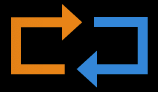

In [6]:
response.content

In [7]:
soup = BeautifulSoup(response.content, "html.parser")

<!DOCTYPE html>

<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport">
<!-- Add to home screen for iOS -->
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<!-- Tile icons for Windows -->
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-bil
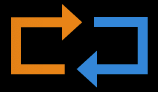

In [8]:
soup

In [9]:
soup.select("li > h3")[0].get_text().strip()


'Anti-Hero'

In [10]:
soup.select("li > h3")[0].find_next("span").get_text().strip()


'Taylor Swift'

In [11]:
song = []
artist = []

In [12]:
num_iter = 100


In [13]:
for i in range(num_iter):
    song.append(soup.select("li > h3")[i].get_text().strip()) ## get song names
    artist.append(soup.select("li > h3")[i].find_next("span").text.strip()) ##get artist names

In [14]:
charts = pd.DataFrame({"song":song,
                       "artist":artist
                      })

In [15]:
charts["pos"] = charts.index

In [16]:
charts["pos"] = charts["pos"]+1

In [17]:
charts

song                  artist  pos
0                   Anti-Hero            Taylor Swift    1
1                   Rich Flex       Drake & 21 Savage    2
2                      Unholy  Sam Smith & Kim Petras    3
3                   Bad Habit              Steve Lacy    4
4                   As It Was            Harry Styles    5
..                        ...                     ...  ...
95              The Great War            Taylor Swift   96
96              Gotta Move On   Diddy & Bryson Tiller   97
97                  Forget Me           Lewis Capaldi   98
98         Going, Going, Gone              Luke Combs   99
99  Bigger Than The Whole Sky            Taylor Swift  100

[100 rows x 3 columns]

### Bonus

Can you find other websites with lists of "hot" songs? What about songs that were popular on a certain decade? 

You can scrape more lists and add extra features to the project.

In [18]:
url1 = "https://www.mtv.de/info/tyk12u/single-top100"

In [19]:
response1 = requests.get(url1)

In [20]:
response1.status_code

200

In [21]:
soup1 = BeautifulSoup(response1.content, "html.parser")

In [22]:
#soup1.select("div > div")[2].text
#soup1.find_all("#document", {"class":"cmn-artist"})
soup1.select("body > div:nth-child(1) > div.cmn-artist")

[]

### 2nd Day - Building User input

In [23]:
import random
import difflib

In [24]:
artist_lower = [artist.lower() for artist in charts.artist]
song_lower = [song.lower() for song in charts.song]
#artist_final = map(lambda each:each.strip("&"), artist_lower)


In [25]:
print(song_final)

NameError: name 'song_final' is not defined

In [26]:
def choice():
    print("Please enter a song: ")
    y = input().lower()
    print(y)
    if y in song_lower:
        return print("Great choice! you might also like this: "+random.choice(song_lower))
    else:
        print("Song is not in Top 100") 
        return choice()

In [27]:
def choice1():
    print("Please enter a song: ")
    y = input().lower()
    #y_match = difflib.get_close_matches(song_lower,1)[0]
    if y == y_match:
        return print("Great choice! you might also like this: "+random.choice(song_lower))
    else:
        print("Song is not in Top 100") 
        return choice1()

In [28]:
choice()

Please enter a song: 
Anti-Hero
anti-hero
Great choice! you might also like this: i ain't worried


In [36]:
url_wiki = "https://en.wikipedia.org/wiki/Lists_of_songs"

In [37]:
response_wiki = requests.get(url_wiki)
response_wiki.status_code

200

In [38]:
soup_wiki = BeautifulSoup(response_wiki.content, "html.parser")

In [40]:
soup_wiki

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Lists of songs - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":true,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"9781c321-d9a3-4956-97d9-7d7b1526965c","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Lists_of_songs","wgTitle":"Lists of songs","wgCurRevisionId":1116497165,"wgRevisionId":1116497165,"wgArticleId":42848292,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Use dmy dates from March 2019","Lists of music lists","Lists of song

In [189]:
soup_wiki.select("ul > li > a", href=True)

[<a href="#By_artist"><span class="tocnumber">1</span> <span class="toctext">By artist</span></a>,
 <a href="#Cover_songs"><span class="tocnumber">2</span> <span class="toctext">Cover songs</span></a>,
 <a href="#By_dance"><span class="tocnumber">3</span> <span class="toctext">By dance</span></a>,
 <a href="#Film"><span class="tocnumber">4</span> <span class="toctext">Film</span></a>,
 <a href="#By_genre"><span class="tocnumber">5</span> <span class="toctext">By genre</span></a>,
 <a href="#By_geography"><span class="tocnumber">6</span> <span class="toctext">By geography</span></a>,
 <a href="#Countries"><span class="tocnumber">6.1</span> <span class="toctext">Countries</span></a>,
 <a href="#Patriotic_songs"><span class="tocnumber">6.1.1</span> <span class="toctext">Patriotic songs</span></a>,
 <a href="#Anthems"><span class="tocnumber">6.1.2</span> <span class="toctext">Anthems</span></a>,
 <a href="#Cities"><span class="tocnumber">6.2</span> <span class="toctext">Cities</span></a>,


In [ ]:
presidents = []
presidents=soup.select(“.wikitable tbody td b a”)
#mw-content-text > div.mw-parser-output > div:nth-child(19) > ul > li:nth-child(1) > a